# Week 03: In Class Assignment: End-to-End Project (Part 2)

### <p style="text-align: right;"> &#9989; Behrendt, Michael
<p style="text-align: right;"> &#9989; Garland, Logan; Aslam, Shawn; Gahramanov, Mazhar,Fatima

## Table of Contents

- [Instructions](#instructions)
- [Part 1. Organization](#part-1.-organization)
- [Part 2. Regression](#part-2.-regression)
- [Part 3. Cross-validation](#part-3.-cross-validation)
- [Part 4: Hyperparameter Tuning/Optimization](#part-4:-hyperparameter-tuning/optimization)
- [Congratulations, you’re done!](#congratulations,-you’re-done!)

![houses](https://www.mercurynews.com/wp-content/uploads/2017/04/oo24dg-web0409buslrealtrendsrisk02.jpg)


<h1><center> <font color='green'>Machine Learning Housing Corp.</font></h1></center>

This In Class Assignment completes what you have done last week with the Pre-Class and In-Class assignment. 

## Instructions

#### 👥 **Group Collaboration**

*   Introduce yourself to your group members and share a bit about your background.
*   Divide the work **evenly** among group members.
*   **Read the entire notebook first** before starting—this helps you plan, divide tasks intelligently, and understand the flow.
* Each of the sections below follow through the process described in the textbook and the notebook that comes with it. Read through that notebook and follow the steps in there. As you work through the notebook, answer the questions below. 


#### 🕒 **Time Management**

*   The notebook is **due at the end of class today**. Submit it to **D2L**.
*   Don’t worry if you don’t finish everything—just do your best.
*   If you get stuck, **write out your ideas** for what you would have done. This shows your thought process and effort.

#### 🚀 **Work Strategy**

*   The problems get more **interesting and challenging** as you go.
*   Move quickly through the early “easy” parts so you have time for the deeper problems later.


#### 📝 **Answer Formatting Guidelines**

✏️ **Text Answers**

*   Write your answers in **Markdown cells**.
*   Begin each answer with:\
    `✏️ **Answer:**`
*   **Do not delete or modify** this marker—it is used to parse your responses.

🧪 **Code Answers**

*   Write your code in **Code cells**.
*   Begin each code cell with:\
    `### ANSWER`
*   If you add new code cells, make sure to include `### ANSWER` at the top.

These markers help instructors and automated tools **identify and extract your answers** efficiently.

### Submission

Please follow the format below when typing your names in the notebook. This is **mandatory** for all group submissions.
**Each student** will turn in a notebook. Note that this is different from the first ICA. You will still work together, but you will come up with your own answers.

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**
- Separate each member's name with a **semicolon (;)**
- Do **not** include any extra text or formatting.
- **Delete this instruction text** and replace it with your names.

#### Example:
    Doe, Jane Marie; Smith, John Alan; Lee, Anna Grace;

⚠️ **Failure to follow this format will result in a reduction of your grade.**

Put your names in the next markdown cell



_Remove this text and add your names_

## Part 1. Organization

Last time you explored the nature of the problem, what the data generally looked like and examined some properties, such as correlations and statistics (thanks to nice functionality in `pandas`),  cleaned the data before it goes into ML algorithms. Now it is time to apply the ML algorithms and get a prediction.

Each of the sections below follow through the process described in the textbook and the notebook that comes with it. Read through that notebook and follow the steps in there. As you work through the notebook, answer the questions below. 

The notebook of Chapter 2 contains all the code used in the chapter, but we don't need all of it. In fact, the textbook shows you multiple ways to do the same thing. Since we want to be able to work with the dataset and run our own ML, I have copied and modified the code relevant for this assignment

🗒️ **Task:** Write the path to your `housing` dataset then run the following and fix any error you might get.

In [11]:
### ANSWER

# Quick tips: we will be using a lot of datasets in this course, so it's a good idea to create a folder called "datasets" 
# easily accessible in which to save all the datasets.
# 
from pathlib import Path
import numpy as np
import pandas as pd


def load_housing_data(file_path):
    return pd.read_csv(file_path)

filepath = Path("ca_housing_project/Data/Raw/housing.csv")
housing = load_housing_data(file_path=filepath)


housing.info


<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [6]:


from sklearn.model_selection import train_test_split

# Add missing features
median = housing["total_bedrooms"].median()  
housing["total_bedrooms"].fillna(median)

# Add in "income category" feature
housing["income_cat"] = pd.cut(housing["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])

#Add in the new features
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]



# Create 1 split set.
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

# remove income category feature
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)


#rename datasets
housing_test = strat_test_set
housing_train = strat_train_set


"""
# Renames the datasets and splits in X and Y
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


# Save a checkpoint
housing.to_csv(Path("datasets/housing/Training_set_nolabels.csv"), index=False)
housing_labels.to_csv(Path("datasets/housing/Training_set_labels.csv"), index=False)

"""

housing_test.to_csv(Path("ca_housing_project/Data/Test/housing_test.csv"))
housing_train.to_csv(Path("ca_housing_project/Data/Train/housing_train.csv"))


housing_train.info



<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  

In [7]:

# Put your code here
# to define auxiliary functions and classes used later on

from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Make column specific pipelines without defining their names.
from sklearn.compose import make_column_selector, make_column_transformer



def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [9]:
# Put your code here
# to make the pipelines

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# Log Pipeline
# Median Imputation + Take the log + Standard Scaler
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

# Numerical pipeline: Median Imputation + Standard Scaling
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]), # bedrooms = Total bedrooms/total rooms
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]), # rooms = total rooms/households
        ("people_per_house", ratio_pipeline(), ["population", "households"]), # people_per_house  = population/ households
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", # Take the log of some columns
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]), # Make cluster from geo data.
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)), # Apply the cat_pipeline to categorical data.
    ],
    remainder=default_num_pipeline)  # apply the default num pipeline to the last column remaining: housing_median_age

In [11]:
# Put your code here
# to run the full preprocessing pipeline and get the names of the features

from sklearn import set_config
set_config(display='diagram')


housing_prepared = preprocessing.fit_transform(housing)
print(f"Shape after preprocessing {housing_prepared.shape}")
preprocessing.get_feature_names_out()

Shape after preprocessing (16512, 24)


array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

---
## Part 2. Regression

If you have your book handy, the ML starts on page 72. 

The three ML methods you will use are:
* [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): even if you have used linear regression before, examine what new options this library provides for you,

* [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html): we have not covered decision trees yet (we will soon!) - you might want to use decision trees in your project so this is a good time to see what they do,

* [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html): what does this do? (again, we will get to ensemble methods later, after decision trees); what are its methods and attributes and options?

🗒️ **Task:** Answer these questions in the markdown cell below:
1. Why does the author pick these algorithms?
2. How does the author modify the pipelines to include the regressors?
3. How does the author choose to measure the performance of the models? Are there any `sklearn` libraries that help here?
4. What does the number returned by `mean_absolute_error` represent?
5. Why does the author choose to predict using the training dataset instead of the test set?


✏️ **Answer:** 
"""
1. The author first used LinearRegression, which is easy but produced a mediocre fit. The DecisionTreeRegressor is a more advanced model capable of determining nonlinear relationship, but it can overfit the data and also had a poor cross-validation score. RandomForestRegressor tests random relationships between variables, an produced a much better cross-validation score.
2. The author adds the following code, which adds the regressor to the existing pipeline:



full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
 ])
 param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
 ]
 grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
 grid_search.fit(housing, housing_labels)

3. The author monitors the performance of the model using "from sklearn.metrics import mean_squared_error

in_rmse = mean_squared_error(housing_labels, housing_predictions,squared=False)




4.Mean Absolute Error is the absolute value of the square root of the values of RMSE

5. The author predicts using the training set because he is attempting to find a model that accurately predicts values within the training set; if a model is not good on the training set it will not be good in the test set. 
"""



---
## Part 3. Cross-validation

<center><img src="https://cdn.aptech.com/www/uploads/2023/05/Blank-diagram-2-1.jpg" width="600"></center>

Cross-validation is a statistical method used to assess and validate the performance of predictive models. Its primary purpose is to estimate how well a model will generalize to new, unseen data. The technique helps prevent overfitting and provides a more robust evaluation of a model's performance compared to using a single train-test split.

Here's a brief overview of how cross-validation is typically used:

* Data partitioning: The dataset is divided into k equal-sized subsets or "folds."
* Iterative process: The model is trained and evaluated k times. In each iteration:
  * One fold is used as the validation set
  * The remaining k-1 folds are used for training
* Performance measurement: The model's performance is measured on the validation set in each iteration.
* Averaging results: The final performance estimate is obtained by averaging the results from all k iterations.

Common types of cross-validation include k-fold (typically with k=5 or k=10) and leave-one-out cross-validation. In machine learning and data science, cross-validation serves several key purposes:

* Model selection: It helps in comparing and selecting the best-performing model among multiple candidates.
* Hyperparameter tuning: It assists in optimizing model hyperparameters by evaluating performance across different settings.
* Assessing generalization: It provides a more reliable estimate of how well the model will perform on new, unseen data.
* Handling limited data: It makes efficient use of available data, particularly useful when the dataset is small.

Cross-validation is an essential tool for developing robust and reliable models in data science applications.

🗒️ **Task:** Using the book's notebook as reference answer the questions below:

1. What `sklearn` function does the author use for cross validation?
2. What are the inputs of this function? Does the author pass the transformed dataset or the original dirty dataset?
3. What is the size of the validation sets?
4. What does each element of the arrays `lin_rmses`, `tree_rmses`, `forest_rmses` represent?

✏️ **Answer:** 
*Put your answers here!*


In [17]:
### ANSWER
"""
1. The author uses  from sklearn.model_selection import cross_val_score

 tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
 scoring="neg_root_mean_squared_error", cv=10)

with tree_reg being the chosen regression model

2. The inputs to this function are the regression data (tree_reg), the oringinal data (housing), the labels for housing (housing_labels), 
the chosen method for scoring (scoring="neg_root_mean_squared_error"), and a value for the number of folds used ( cv=10)

3. Using a cv=10, each validation set will be equal to 1/10 of the training set


4. 
 count: The number of elements in the matrix (same as the number of folds used)
 mean: The average value, which the average of all the calculated RMSE for each fold
 std: The standard deviation of the RMSE values
 min: The minimum value in the series
 25%: The average value for a 25% confidence interval
 50%: The average value for a 50% confidence interval
 75%: The average value for a 75% confidence interval
 max: The maximum value in the series
 dtype: The type of variable in this Pandas series
"""




'\n1. The author uses  from sklearn.model_selection import cross_val_score\n\n tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,\n scoring="neg_root_mean_squared_error", cv=10)\n\nwith tree_reg being the chosen regression model\n\n2. The inputs to this function are the regression data (tree_reg), the oringinal data (housing), the labels for housing (housing_labels), \nthe chosen method for scoring (scoring="neg_root_mean_squared_error"), and a value for the number of folds used ( cv=10)\n\n3. Using a cv=10, each validation set will be equal to 1/10 of the training set\n\n\n4. \n count: The number of elements in the matrix (same as the number of folds used)\n mean: The average value, which the average of all the calculated RMSE for each fold\n std: The standard deviation of the RMSE values\n min: The minimum value in the series\n 25%: The average value for a 25% confidence interval\n 50%: The average value for a 50% confidence interval\n 75%: The average value for a 75% c

### 3.1 Apply it

Let's try it ourselves. The code in the next cell uses four regression models; the three models in the textbook plus a Support Vector Regressor (SVR). For the moment we will use the default and see how it performs on the dataset. 


🗒️ **Task:** Read through the code and comment it. Note that this can take a while, so try to run it on the fastest machine in your group. Try changing the number of folds and the size of the dataset. SVR is notoriously slow to train. 

In [41]:
### ANSWER
# 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Dataset sizes
max_samples = int(housing.shape[0] * 0.3)   # <- 80% of the dataset. Try also 0.3, 0.5, 0.7
print(f"Max samples: {max_samples}")
cv_folds = 3 # <- Number of cross-validation folds. Try to change this number to see how it affects the results. Do not go below 3 though.

# Assuming 'housing' and 'housing_labels' are already defined
housing_sample = housing[:max_samples]
housing_labels_sample = housing_labels[:max_samples]

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_rmses = -cross_val_score(lin_reg, housing_sample, housing_labels_sample,
                              scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_rmses = -cross_val_score(tree_reg, housing_sample, housing_labels_sample,
                              scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing_sample, housing_labels_sample,
                                scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

svr_reg = make_pipeline(preprocessing, SVR())
svr_rmses = -cross_val_score(svr_reg, housing_sample, housing_labels_sample, scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

print(f"Lin Rmses 3 fold: {lin_rmses}")
print(f"Forest Rmses 3 fold: {forest_rmses}")
print(f"Tree Rmses 3 fold: {tree_rmses}")
print(f"SVR Rmses 3 fold: {svr_rmses}")

cv_folds = 5 # <- Number of cross-validation folds. Try to change this number to see how it affects the results. Do not go below 3 though.

# Assuming 'housing' and 'housing_labels' are already defined
housing_sample = housing[:max_samples]
housing_labels_sample = housing_labels[:max_samples]

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_rmses = -cross_val_score(lin_reg, housing_sample, housing_labels_sample,
                              scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_rmses = -cross_val_score(tree_reg, housing_sample, housing_labels_sample,
                              scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing_sample, housing_labels_sample,
                                scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

svr_reg = make_pipeline(preprocessing, SVR())
svr_rmses = -cross_val_score(svr_reg, housing_sample, housing_labels_sample, scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)


print(f"Lin Rmses 5 fold: {lin_rmses}")
print(f"Forest Rmses 5 fold: {forest_rmses}")
print(f"Tree Rmses 5 fold: {tree_rmses}")
print(f"SVR Rmses 5 fold: {svr_rmses}")

cv_folds = 7 # <- Number of cross-validation folds. Try to change this number to see how it affects the results. Do not go below 3 though.

# Assuming 'housing' and 'housing_labels' are already defined
housing_sample = housing[:max_samples]
housing_labels_sample = housing_labels[:max_samples]

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_rmses = -cross_val_score(lin_reg, housing_sample, housing_labels_sample,
                              scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_rmses = -cross_val_score(tree_reg, housing_sample, housing_labels_sample,
                              scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing_sample, housing_labels_sample,
                                scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)

svr_reg = make_pipeline(preprocessing, SVR())
svr_rmses = -cross_val_score(svr_reg, housing_sample, housing_labels_sample, scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)


print(f"Lin Rmses 5 fold: {lin_rmses}")
print(f"Forest Rmses 7 fold: {forest_rmses}")
print(f"Tree Rmses 7 fold: {tree_rmses}")
print(f"SVR Rmses 7 fold: {svr_rmses}")

svr_reg = make_pipeline(preprocessing, SVR())
svr_rmses = -cross_val_score(svr_reg, housing_sample, housing_labels_sample, scoring="neg_root_mean_squared_error", cv=cv_folds, n_jobs=-1)
                             

Max samples: 4953
Lin Rmses 3 fold: [72317.39727603 66778.20145306 65018.03653106]
Forest Rmses 3 fold: [52086.62562361 51861.3606148  50438.57308718]
Tree Rmses 3 fold: [72872.52281645 69499.9865287  75068.45938602]
SVR Rmses 3 fold: [120511.13338603 122439.60536545 116431.60835503]
Lin Rmses 5 fold: [71645.76565363 67609.0657315  67551.04718547 64875.12624989
 64608.35428068]
Forest Rmses 5 fold: [51878.12837912 51557.9971182  51905.8613099  50518.48084406
 49594.77015562]
Tree Rmses 5 fold: [73550.75720629 69734.41764639 70643.10809513 69390.68249862
 76246.34725241]
SVR Rmses 5 fold: [122906.90812721 118474.4792706  123894.57407887 117925.9273407
 115583.50625403]
Lin Rmses 5 fold: [72669.92475169 74612.66535768 66347.22494701 68641.4992317
 64377.87562573 66458.57761304 63388.3015988 ]
Forest Rmses 7 fold: [51288.29747272 50917.65202237 50302.12625517 54645.45704939
 47903.53039429 52053.21836462 49090.4698482 ]
Tree Rmses 7 fold: [68973.71795811 69247.71074595 72960.31933921 7167

🗒️ **Coding Task:** In the code cell below, make a plot of the validation scores of each regressor vs the number of folds. Note that running the above code can take a while, you could reduce the number of folds, but don't go below 3.

_Hint:_ Have the person with the fastest computer run the above cell.


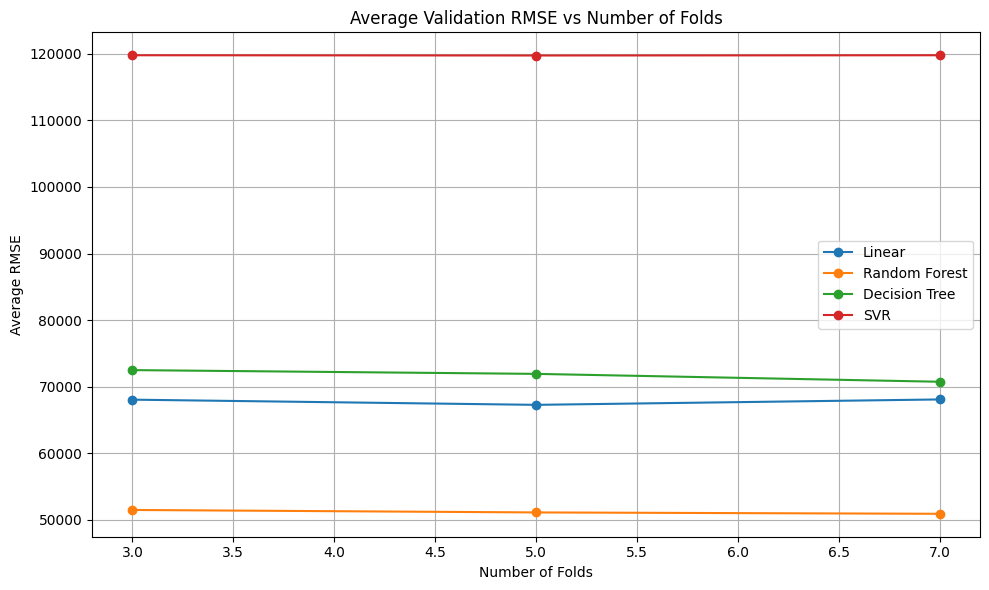

In [47]:
### ANSWER

import matplotlib.pyplot as plt
import numpy as np

# RMSE data
rmse_data = {
    'Linear': {
        3: [72317.39727603, 66778.20145306, 65018.03653106],
        5: [71645.76565363, 67609.0657315, 67551.04718547, 64875.12624989, 64608.35428068],
        7: [72669.92475169, 74612.66535768, 66347.22494701, 68641.4992317, 64377.87562573, 66458.57761304, 63388.3015988]
    },
    'Random Forest': {
        3: [52086.62562361, 51861.3606148, 50438.57308718],
        5: [51878.12837912, 51557.9971182, 51905.8613099, 50518.48084406, 49594.77015562],
        7: [51288.29747272, 50917.65202237, 50302.12625517, 54645.45704939, 47903.53039429, 52053.21836462, 49090.4698482]
    },
    'Decision Tree': {
        3: [72872.52281645, 69499.9865287, 75068.45938602],
        5: [73550.75720629, 69734.41764639, 70643.10809513, 69390.68249862, 76246.34725241],
        7: [68973.71795811, 69247.71074595, 72960.31933921, 71679.69872151, 65636.92323669, 74356.96673208, 72244.21785205]
    },
    'SVR': {
        3: [120511.13338603, 122439.60536545, 116431.60835503],
        5: [122906.90812721, 118474.4792706, 123894.57407887, 117925.9273407, 115583.50625403],
        7: [121346.22632581, 121601.01549898, 121275.48421389, 122292.16791843, 116830.9702002, 117091.103754, 118116.58338691]
    }
}

# Prepare plot
plt.figure(figsize=(10, 6))

for model, folds_data in rmse_data.items():
    folds = sorted(folds_data.keys())
    avg_rmse = [np.mean(folds_data[k]) for k in folds]
    plt.plot(folds, avg_rmse, marker='o', label=model)

# Customize plot
plt.title('Average Validation RMSE vs Number of Folds')
plt.xlabel('Number of Folds')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


🗒️ **Task:** Answer these questions in the next cell. How does the plot look? Are the curves relatively flat? What would it mean if they weren't flat but increasing with the fold number?

✏️ **Answer:** 
Answers are very flat. If the curves are highly dependent on fold number, that is an indication that there is some instability or overfitting of the data. 


---
## Part 4: Hyperparameter Tuning/Optimization 

<div style="text-align: center;">
    <img src="https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/74545i97245FDAA10376E9/image-size/large?v=1.0&px=999" width="600">
</div>


At this point, what have you done? A lot of data science and lot of data cleaning and a lot of exploring accuracy of algorithms with CV. Now you can pick which estimator you want to use. In this case we go with the Random Forest since it is the model with the lowest cv scores.

The next phase of the ML workflow is making your estimator really work for you. As you saw above, each of the algorithms comes with a host of options. The parameters associated with those options are called "hyperparameters" because they are **internal to your estimator** and are separate from the parameters of your model. Like some of the other steps you have been following, hyperparameter tuning is so ubiquitous that `sklearn` has nice tools to help you. 

The difference between a parameter of your model and the hyperparameters of your estimator can be confusing. Here is a good way to understand the difference: look at the documentation for each of the estimators. You will see that each one accepts a large number of inputs, many of which are set to some default value. (You probably should look at something like the [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) rather than linear regression, which is too simple to have many options.) Most of these options, which you may typically ignore, are the hyperparameter that define the way the estimator is set up. This is because, for example, there isn't one decision tree, there are infinitely many -- which one do you want to use? 

To find the hyperparameters, you might need to do the training hundreds or thousands of times! But, the payoff is the most accurate algorithm! 

How do we search for the best hyperparameters?

🗒️ **Task:** Research [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and give a short summary of what it can do for you. How do you use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with different algorithms?


✏️ **Answer:** 

GridSearchCV is a method for tuning hyperparameters, and evaluated the possibilities for cross-validation until it finds an optimal value. For different algorithms, the "model" can be changed. This examples uses RandomForestClassifier(), but you can use any model.


from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

Define model
model = RandomForestClassifier()

Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

Set up GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

Fit to training data

grid_search.fit(X_train, y_train)

Get best parameters and score

print(grid_search.best_params_)

print(grid_search.best_score_)

answer was assisted by Microsoft Copilot, 9/10/2025


Below is a snippet of the code of the notebook. 

```python
    param_grid = [
        {'preprocessing__geo__n_clusters': [5, 8, 10],
        'random_forest__max_features': [4, 6, 8]},
        {'preprocessing__geo__n_clusters': [10, 15],
        'random_forest__max_features': [6, 8, 10]},
    ]
    grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                            scoring='neg_root_mean_squared_error', n_jobs = -1)
    grid_search.fit(housing, housing_labels)
```

🗒️ **Task:**  Answer these questions in the markdown cell below:

1. Why are there two dictionaries in the `params_grid` list? Do they refer to different estimators in the pipeline? Why not putting them all together ?

2. What does the option `cv = 3` do?

3. What does `n_jobs` do?

✏️ **Answer:** 
1. The two dictionaries allow for different grids of parameters to be tested. Limiting the grids in this way lowers the computational power required. The tested hyperparameters are for a preprocessing step and the final estimator.
2. The option cv=3 sets the cross-validation to use 3 folds
3. 'n_jobs' sets the number of cores that are used for the computational process. In the code above, n_jobs=-1 uses the maximum available cores.

# answer was assisted by Microsoft Copilot, 9/10/2025



🗒️ **Task:** Research [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and give a short summary of what it can do for you.

* How does it differ from `GridSearchCV` ?
* Why would you choose one over the other?

✏️ **Answer:** 
RandomizedSearchCV picks a certain number of random hyperparameter combinations, and is best for large samples where exhaustive testing is impractical.


### 4.1 Apply it to SVR

Let's try hyperparameter tuning on our new estimator; the SVR.

🗒️ **Task:** In the next cell, write code to perform both a randomized search and a grid search on the parameters of the SVR. Use only the `kernel`, `C`, and `gamma` parameters.

__Note:__ This is going to be very slow, use `max_sample = 5000` and only `cv = 3`

In [50]:
### ANSWER


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from scipy.stats import uniform
import numpy as np

max_samples = 5000
cv_folds = 3 # <- Number of cross-validation folds. Try to change this number to see how it affects the results. Do not go below 3 though.

# Assuming 'housing' and 'housing_labels' are already defined
housing_sample = housing[:max_samples]
housing_labels_sample = housing_labels[:max_samples]





# Define pipeline
pipeline = svr_reg

# Grid of parameters
param_grid = [
    {'svr__kernel': ['linear'], 'svr__C': [1, 10, 100]},
    {'svr__kernel': ['rbf'], 'svr__C': [1, 10, 100], 'svr__gamma': [0.01, 0.1, 1]}
]

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(housing_sample, housing_labels_sample)

print("Best GridSearchCV Parameters:", grid_search.best_params_)
print("Best GridSearchCV Score:", -grid_search.best_score_)

# Random distributions

param_distributions = {
    'svr__kernel': ['linear', 'rbf'],
    'svr__C': uniform(1, 100),
    'svr__gamma': uniform(0.01, 1)
}

random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=3,
                                   scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(housing_sample, housing_labels_sample)

print("Best RandomizedSearchCV Parameters:", random_search.best_params_)
print("Best RandomizedSearchCV Score:", -random_search.best_score_)



Best GridSearchCV Parameters: {'svr__C': 100, 'svr__kernel': 'linear'}
Best GridSearchCV Score: 6335874632.178973
Best RandomizedSearchCV Parameters: {'svr__C': np.float64(99.32308858067881), 'svr__gamma': np.float64(0.47676289324797994), 'svr__kernel': 'linear'}
Best RandomizedSearchCV Score: 6347511317.706333


🗒️ **Task:** How does the SVR compare with the previous ones? Make a table comparing the scores of all the ML models.

✏️ **Answer:** 
*Put your answers here!*


In [54]:
### ANSWER
"""
The score for SearchCV is not directly comparable to RMSES values
"""

import numpy as np

ml_scores = [
    {"Model": "SVR", "Method": "GridSearchCV", "Folds": 3,
     "Params": {"svr__C": 100, "svr__kernel": "linear"},
     "Mean_RMSE": np.sqrt(6335874632.178973),
     "RMSEs": None},

    {"Model": "SVR", "Method": "RandomizedSearchCV", "Folds": 3,
     "Params": {"svr__C": 99.32308858067881, "svr__gamma": 0.47676289324797994, "svr__kernel": "linear"},
     "Mean_RMSE": np.sqrt(6347511317.706333),
     "RMSEs": None},

    {"Model": "Linear", "Method": "cross_val_score", "Folds": 3,
     "Params": None,
     "Mean_RMSE": np.mean([72317.39727603, 66778.20145306, 65018.03653106]),
     "RMSEs": [72317.39727603, 66778.20145306, 65018.03653106]},

    {"Model": "Forest", "Method": "cross_val_score", "Folds": 3,
     "Params": None,
     "Mean_RMSE": np.mean([52086.62562361, 51861.3606148, 50438.57308718]),
     "RMSEs": [52086.62562361, 51861.3606148, 50438.57308718]},

    {"Model": "Tree", "Method": "cross_val_score", "Folds": 3,
     "Params": None,
     "Mean_RMSE": np.mean([72872.52281645, 69499.9865287, 75068.45938602]),
     "RMSEs": [72872.52281645, 69499.9865287, 75068.45938602]},

    {"Model": "SVR", "Method": "cross_val_score", "Folds": 3,
     "Params": None,
     "Mean_RMSE": np.mean([120511.13338603, 122439.60536545, 116431.60835503]),
     "RMSEs": [120511.13338603, 122439.60536545, 116431.60835503]},

    {"Model": "Linear", "Method": "cross_val_score", "Folds": 5,
     "Params": None,
     "Mean_RMSE": np.mean([71645.76565363, 67609.0657315, 67551.04718547, 64875.12624989, 64608.35428068]),
     "RMSEs": [71645.76565363, 67609.0657315, 67551.04718547, 64875.12624989, 64608.35428068]},

    {"Model": "Forest", "Method": "cross_val_score", "Folds": 5,
     "Params": None,
     "Mean_RMSE": np.mean([51878.12837912, 51557.9971182, 51905.8613099, 50518.48084406, 49594.77015562]),
     "RMSEs": [51878.12837912, 51557.9971182, 51905.8613099, 50518.48084406, 49594.77015562]},

    {"Model": "Tree", "Method": "cross_val_score", "Folds": 5,
     "Params": None,
     "Mean_RMSE": np.mean([73550.75720629, 69734.41764639, 70643.10809513, 69390.68249862, 76246.34725241]),
     "RMSEs": [73550.75720629, 69734.41764639, 70643.10809513, 69390.68249862, 76246.34725241]},

    {"Model": "SVR", "Method": "cross_val_score", "Folds": 5,
     "Params": None,
     "Mean_RMSE": np.mean([122906.90812721, 118474.4792706, 123894.57407887, 117925.9273407, 115583.50625403]),
     "RMSEs": [122906.90812721, 118474.4792706, 123894.57407887, 117925.9273407, 115583.50625403]},

    {"Model": "Linear", "Method": "cross_val_score", "Folds": 7,
     "Params": None,
     "Mean_RMSE": np.mean([72669.92475169, 74612.66535768, 66347.22494701, 68641.4992317, 64377.87562573, 66458.57761304, 63388.3015988]),
     "RMSEs": [72669.92475169, 74612.66535768, 66347.22494701, 68641.4992317, 64377.87562573, 66458.57761304, 63388.3015988]},

    {"Model": "Forest", "Method": "cross_val_score", "Folds": 7,
     "Params": None,
     "Mean_RMSE": np.mean([51288.29747272, 50917.65202237, 50302.12625517, 54645.45704939, 47903.53039429, 52053.21836462, 49090.4698482]),
     "RMSEs": [51288.29747272, 50917.65202237, 50302.12625517, 54645.45704939, 47903.53039429, 52053.21836462, 49090.4698482]},

    {"Model": "Tree", "Method": "cross_val_score", "Folds": 7,
     "Params": None,
     "Mean_RMSE": np.mean([68973.71795811, 69247.71074595, 72960.31933921, 71679.69872151, 65636.92323669, 74356.96673208, 72244.21785205]),
     "RMSEs": [68973.71795811, 69247.71074595, 72960.31933921, 71679.69872151, 65636.92323669, 74356.96673208, 72244.21785205]},

    {"Model": "SVR", "Method": "cross_val_score", "Folds": 7,
     "Params": None,
     "Mean_RMSE": np.mean([121346.22632581, 121601.01549898, 121275.48421389, 122292.16791843, 116830.9702002, 117091.103754, 118116.58338691]),
     "RMSEs": [121346.22632581, 121601.01549898, 121275.48421389, 122292.16791843, 116830.9702002, 117091.103754, 118116.58338691]}
]

df = pd.DataFrame(ml_scores)
print(df[["Model", "Method", "Folds", "Mean_RMSE"]])



     Model              Method  Folds      Mean_RMSE
0      SVR        GridSearchCV      3   79598.207468
1      SVR  RandomizedSearchCV      3   79671.270341
2   Linear     cross_val_score      3   68037.878420
3   Forest     cross_val_score      3   51462.186442
4     Tree     cross_val_score      3   72480.322910
5      SVR     cross_val_score      3  119794.115702
6   Linear     cross_val_score      5   67257.871820
7   Forest     cross_val_score      5   51091.047561
8     Tree     cross_val_score      5   71913.062540
9      SVR     cross_val_score      5  119757.079014
10  Linear     cross_val_score      7   68070.867018
11  Forest     cross_val_score      7   50885.821630
12    Tree     cross_val_score      7   70728.507798
13     SVR     cross_val_score      7  119793.364471


___

## Congratulations, you’re done!

Submit this assignment by uploading it to the course Desire2Learn web page. Go to the “In-class assignments” folder, find the appropriate submission link, and upload it there.

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.